# Analisis de Datos

## Analisis de Sesiones Temporales(t x d)

### Cargar Datos

In [1]:
import pandas as pd

file ='./data2/resultados.csv'
data = pd.read_csv(file)
data.head()

,customer_tag,year,week,profile_id,size,d0t0,d1t0,d2t0,d3t0,d4t0,...,d6t2,d0t3,d1t3,d2t3,d3t3,d4t3,d5t3,d6t3,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,27,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
1,++/oQ9Lb9dI=,2017,22,0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
2,++14g8obpj0=,2016,36,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,++14g8obpj0=,2016,35,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1
4,++14g8obpj0=,2016,31,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


### Graficos

In [2]:
import matplotlib.pyplot as plt
import numpy as np


### Comportamiento del cluster ?

In [3]:
# cluster = data.groupby(['collective_cluster']).sum().reset_index()
cluster = data.groupby(['collective_cluster']).sum()
cluster = cluster.iloc[:, 4:-1]
num_cluster= len(cluster)

In [4]:
cluster_n = 0 # seleciona cluster
cluster_i = cluster[cluster.index == cluster_n]
i = 0
df0 = cluster_i.iloc[:, (i)*7:(i+1)*7]  
i = 1
df1 = cluster_i.iloc[:, (i)*7:(i+1)*7]
i = 2
df2 = cluster_i.iloc[:, (i)*7:(i+1)*7]
i = 3
df3 = cluster_i.iloc[:, (i)*7:(i+1)*7]

df0 = df0.transpose().reset_index(drop=True).transpose()
df1 = df1.transpose().reset_index(drop=True).transpose()
df2 = df2.transpose().reset_index(drop=True).transpose()
df3 = df3.transpose().reset_index(drop=True).transpose()


dfs = [df0,df1,df2,df3]
df = pd.concat( dfs,axis=0,ignore_index=True)
df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
df.index = ['Madrugada','Mañana', 'Tarde','Noche']
df

,Lun,Mar,Mie,Jue,Vie,Sab,Dom
Madrugada,103.0,89.0,90.0,107.0,112.0,37035.0,173.0
Mañana,4.0,4.0,4.0,7.0,11.0,26.0,14.0
Tarde,29.0,43.0,37.0,40.0,37.0,114.0,58.0
Noche,875.0,97.0,158.0,1040.0,160.0,2350.0,280.0


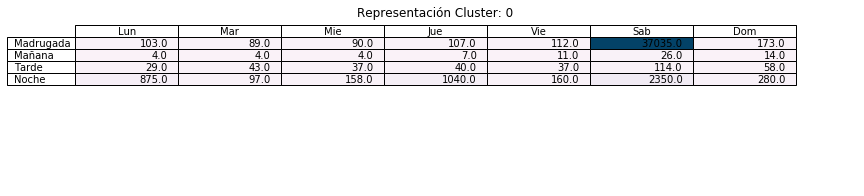

In [5]:
m = np.around(df.values,2)
vals = np.around(df.values/(cluster_i.values).mean(),2)
normal = plt.Normalize(vals.min()-1, vals.max()+1)

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])


ax.set_title('Representación Cluster: %s'%(cluster_n))
the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.123]*vals.shape[1], loc='upper center', 
                    cellColours=plt.cm.PuBu(normal(vals)))

## Comportamientos de los clientes (k cluster)

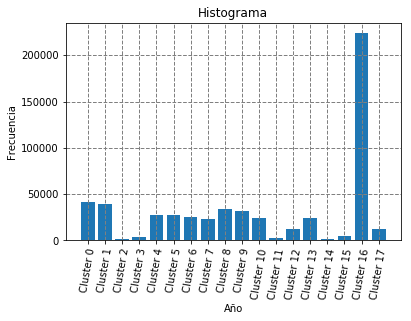

In [6]:
fig, ax = plt.subplots()
hist = data.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
longitud = len(hist)
ax.bar(hist.index, hist['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

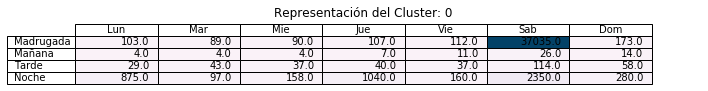

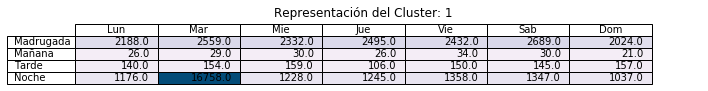

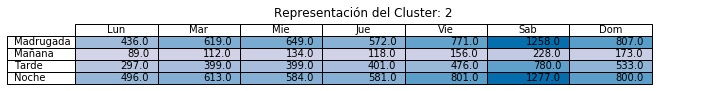

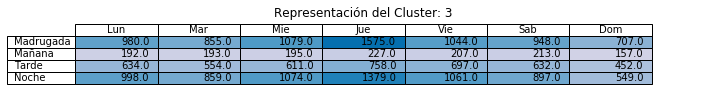

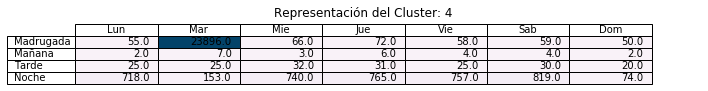

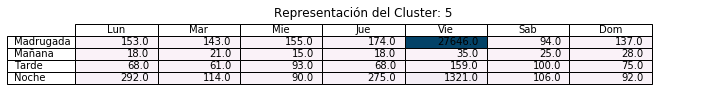

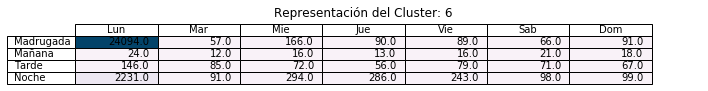

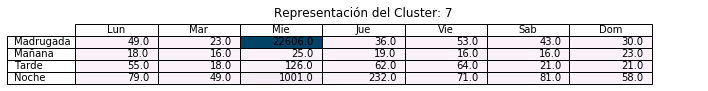

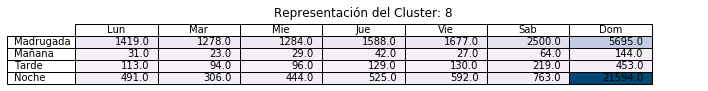

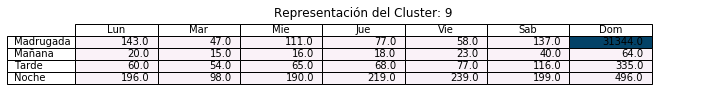

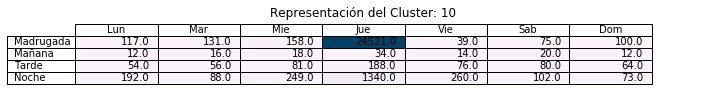

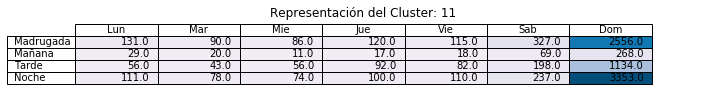

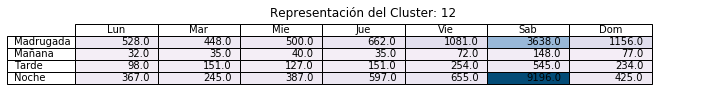

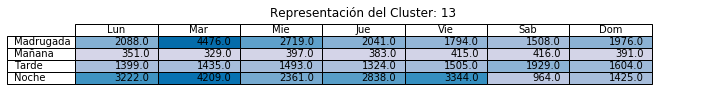

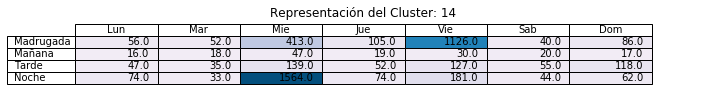

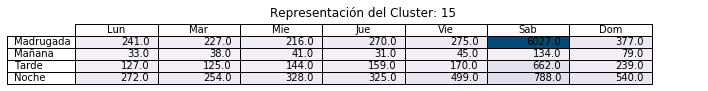

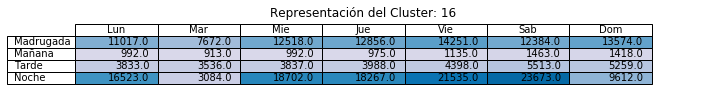

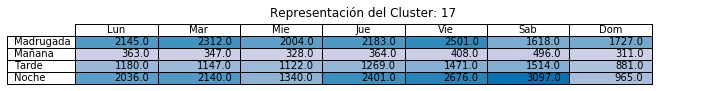

In [7]:
for kk in range(num_cluster):
    cluster_i = cluster[cluster.index == kk]
    df0 = cluster_i.iloc[:, 0:7] 
    df1 = cluster_i.iloc[:, 7:14]
    df2 = cluster_i.iloc[:, 14:21]
    df3 = cluster_i.iloc[:, 21:28]

    df0 = df0.transpose().reset_index(drop=True).transpose()
    df1 = df1.transpose().reset_index(drop=True).transpose()
    df2 = df2.transpose().reset_index(drop=True).transpose()
    df3 = df3.transpose().reset_index(drop=True).transpose()

    dfs = [df0,df1,df2,df3]
    df = pd.concat( dfs,axis=0,ignore_index=True)
    df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
    df.index = ['Madrugada','Mañana', 'Tarde','Noche']
    
    m = np.around(df.values,2)
    vals = np.around(df.values/(cluster_i.values).mean(),2)
    normal = plt.Normalize(vals.min()-1, vals.max()+1)

    fig = plt.figure(figsize=(12,1))
    
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title('Representación del Cluster: %s'%(kk))
    the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.123]*vals.shape[1], loc='upper center', 
                        cellColours=plt.cm.PuBu(normal(vals)))

### Comportamiento de los clusters en el tiempo

In [8]:
helper = data.groupby(['year','week','collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
helper['fecha'] = helper['year'].astype(str).str.cat(helper['week'].astype(str), sep='-')
helper = helper[['fecha','collective_cluster','customer_tag']]
helper.head(5)

,fecha,collective_cluster,customer_tag
0,2016-22,0,731
1,2016-22,1,314
2,2016-22,2,18
3,2016-22,3,56
4,2016-22,4,63


No handles with labels found to put in legend.


Text(0,0.5,'Cantidad')

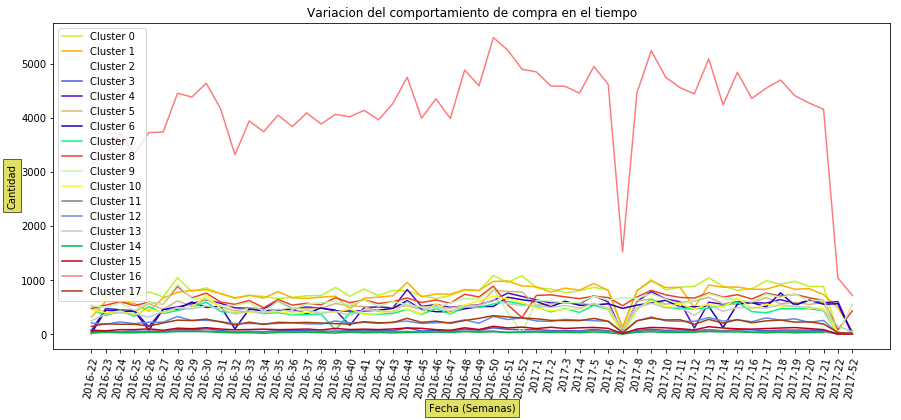

In [9]:
import matplotlib._color_data as mcd
box = dict(facecolor='#cccc00', pad=4, alpha=0.6)


fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, frameon=True)
x = list(helper['fecha'].drop_duplicates())
ax.set_xticklabels(x, rotation=80)

# ------------ COLORES ---------------------
overlap = mcd.XKCD_COLORS
colores = ["" for x in range(len(overlap))]
for j, n in enumerate(sorted(overlap, reverse=True)):
    cor = mcd.XKCD_COLORS[n].upper()
    colores[j] = cor
    
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


for i in range(longitud):
    cluster_i = helper[helper['collective_cluster']==i]
    y = cluster_i['customer_tag']
    x = cluster_i['fecha']
   # ax.plot(x,y,'-',color='C'+str(i)+'')
    ax.plot(x,y,'-',color=colores[i*10],label="Cluster "+str(i))
    #ax.plot(x,y,'ob',color=colores[i])


ax.legend()
ax.set_title('Variacion del comportamiento de compra en el tiempo')
ax.set_xlabel('Fecha (Semanas)', bbox=box)
ax.set_ylabel('Cantidad', bbox=box)


In [10]:
cluster_i = helper[helper['collective_cluster']==0]
cluster_i.head(3)

,fecha,collective_cluster,customer_tag
0,2016-22,0,731
18,2016-23,0,697
36,2016-24,0,727
